In [1]:
#!jt -t monokai -T -N -kl
#!jt -r

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [3]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 14)
#plt.style.use('dark_background')
plt.style.use('ggplot')

In [4]:
url_country = 'https://github.com/datasets/covid-19/raw/master/data/countries-aggregated.csv'
country_df = pd.read_csv(url_country)[['Date', 'Country', 'Deaths']]

In [5]:
W = pd.DataFrame(country_df.groupby('Date').sum())
W['Country'] = ['World' for _ in range(len(W))]
W['Date'] = W.index
country_df = country_df.append(W)

c:\users\prasu\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [6]:
Deaths = pd.DataFrame()
Deaths['Date'] = country_df.Date.unique()
Deaths['Date'] = pd.to_datetime(Deaths.Date)
#Deaths = Deaths.set_index('Date')

In [7]:
countries = country_df['Country'].unique()
for c in countries:
    cun = country_df[country_df.Country == c].Deaths
    if 'Korea' in c:
        c = 'S.Korea'
    if c == 'United Kingdom':
        c = 'UK'
    Deaths[c] = list(cun)
Deaths = Deaths.set_index('Date')

In [8]:
Important_countries = ['India', 'World', #'World without China',
                      'US', 'Germany', 'Italy', 'Spain', 'China',
                      'UK', 'France',
                      'S.Korea', 'Iran', 
                       'Russia', 'Mexico', 'Canada']#[::-1]
colors = {'India': 'Blue', 'World': 'Blue', 'World without US': 'Green', 'US': 'Black', 'China': 'red', 
          'Spain': 'yellow','Italy': 'grey', 'Iran': 'brown', 'Ireland': 'violet', 'UK': 'Purple', 
          'S.Korea': 'Black', 'France': 'orange', 'Germany': 'Green', 'Australia': 'Teal',
          'Russia': 'Brown', 'Mexico': 'Orange', 'Canada': 'Teal'}
def plotter(DF, name, log = True):
    plt.figure(figsize = (14, 7))
    if log:
        if log == 'symlog':
            plt.yscale('symlog')
        else:
            plt.yscale('log')
    if len(DF.columns)>len(Important_countries):
        columns = Important_countries
    else:
        columns = DF.columns
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col,
                 linestyle = '-.' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 #alpha = 0.6
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend()
    plt.show()

In [9]:
def plot2(DF, DF2, name1, name2 = 'Deaths', log = True):
    plt.figure(figsize = (14, 7))
    if log:
        plt.xscale('log')
        if log == 'symlog':
            plt.yscale('symlog')
        else:
            plt.yscale('log')
    if len(DF.columns)>len(Important_countries):
        columns = Important_countries
    else:
        columns = DF.columns
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col,
                 linestyle = '-.' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 #alpha = 0.6
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend()
    plt.show()

In [10]:
Deaths.tail(14)[Important_countries]

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-04-27,939,214444,56219,6126,26977,23521,4637,24458,23296,244,5806,794,1434,2841
2020-04-28,1008,220801,58355,6314,27359,23822,4637,25369,23663,246,5877,867,1569,2983
2020-04-29,1079,227665,60967,6467,27682,24275,4637,26166,24090,247,5957,972,1732,3155
2020-04-30,1154,233360,62996,6623,27967,24543,4637,26842,24379,248,6028,1073,1859,3310
2020-05-01,1223,238619,64943,6736,28236,24543,4637,27583,24597,250,6091,1169,1972,3537
2020-05-02,1323,243813,66369,6812,28710,25100,4637,28205,24763,250,6156,1222,2061,3684
2020-05-03,1391,247470,67682,6866,28884,25264,4637,28520,24900,252,6203,1280,2154,3795
2020-05-04,1566,251537,68922,6993,29079,25428,4637,28809,25204,254,6277,1356,2271,4003
2020-05-05,1693,257239,71064,6993,29315,25613,4637,29501,25537,255,6340,1451,2507,4190


c:\users\prasu\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


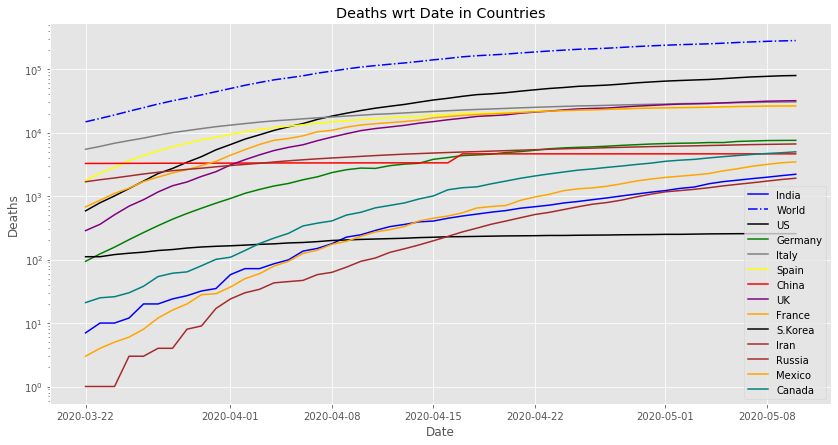

In [11]:
plotter(Deaths[Important_countries].tail(50), 'Deaths')

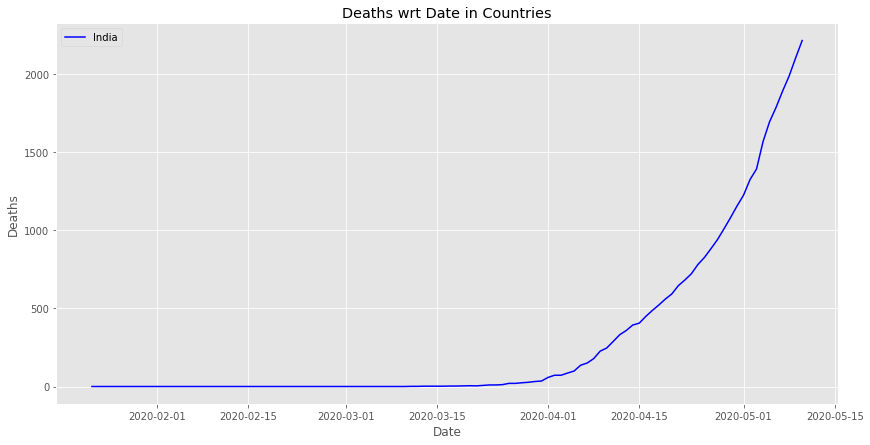

In [12]:
plotter(Deaths[['India']], 'Deaths', False)
#Deaths[['India']].tail(50)

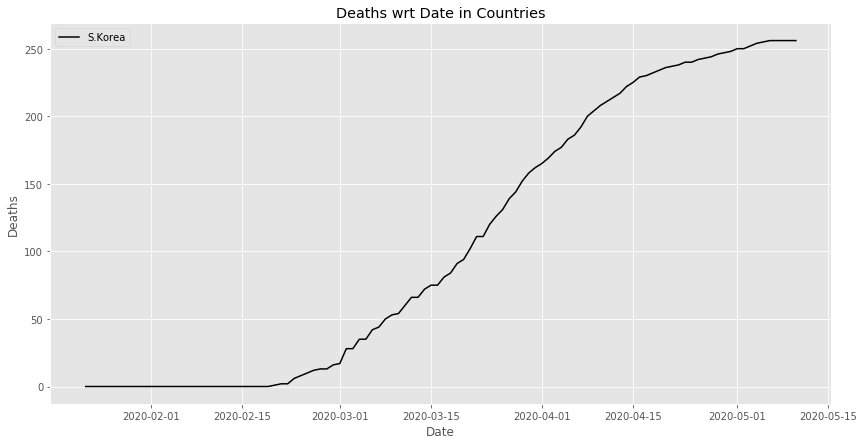

In [13]:
plotter(Deaths[['S.Korea']], 'Deaths', False)

In [14]:
Removed = np.round(Deaths/0.02).astype('int')
Removed[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-04-27,46950,10722200,2810950,306300,1348850,1176050,231850,1222900,1164800,12200,290300,39700,71700,142050
2020-04-28,50400,11040050,2917750,315700,1367950,1191100,231850,1268450,1183150,12300,293850,43350,78450,149150
2020-04-29,53950,11383250,3048350,323350,1384100,1213750,231850,1308300,1204500,12350,297850,48600,86600,157750
2020-04-30,57700,11668000,3149800,331150,1398350,1227150,231850,1342100,1218950,12400,301400,53650,92950,165500
2020-05-01,61150,11930950,3247150,336800,1411800,1227150,231850,1379150,1229850,12500,304550,58450,98600,176850
2020-05-02,66150,12190650,3318450,340600,1435500,1255000,231850,1410250,1238150,12500,307800,61100,103050,184200
2020-05-03,69550,12373500,3384100,343300,1444200,1263200,231850,1426000,1245000,12600,310150,64000,107700,189750
2020-05-04,78300,12576850,3446100,349650,1453950,1271400,231850,1440450,1260200,12700,313850,67800,113550,200150
2020-05-05,84650,12861950,3553200,349650,1465750,1280650,231850,1475050,1276850,12750,317000,72550,125350,209500


In [15]:
Biweekly_Deaths = Deaths - Deaths.shift(14)
Biweekly_Deaths = Biweekly_Deaths.fillna(0).astype('int')
Biweekly_Deaths[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-04-27,581,88883,28349,2932,6512,5765,1292,11411,8310,27,1221,646,1102,2060
2020-04-28,615,88362,28093,3020,6292,5766,1292,11274,7932,24,1194,697,1163,2082
2020-04-29,674,87006,28233,2663,6037,5567,1291,11225,6921,22,1180,774,1283,2147
2020-04-30,706,85414,28169,2571,5797,5228,1291,10868,6457,19,1159,841,1373,2051
2020-05-01,737,81815,27532,2384,5491,4541,1,10673,5914,20,1133,896,1426,2181
2020-05-02,802,80599,26616,2353,5483,5057,1,10177,5438,18,1125,909,1411,2283
2020-05-03,832,79698,26737,2280,5224,4811,1,9993,5180,18,1085,919,1468,2230
2020-05-04,974,78440,26263,2131,4965,4576,1,9717,4937,18,1068,951,1559,2276
2020-05-05,1048,77003,25978,1960,4667,4331,1,9237,4739,18,1043,995,1650,2280


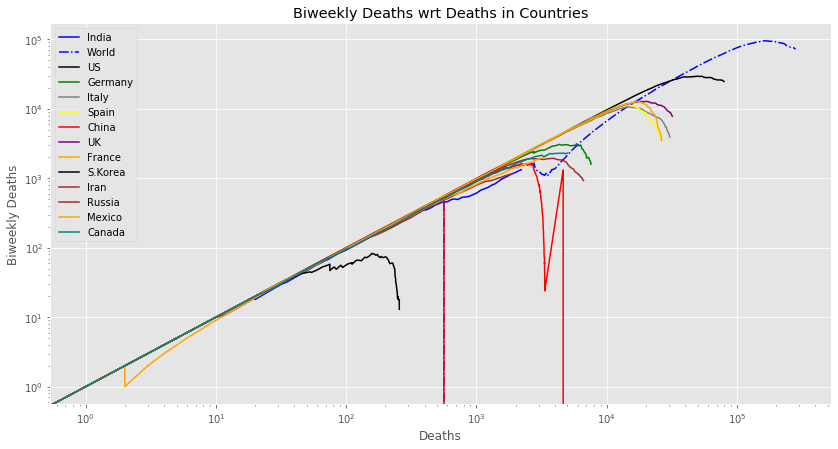

In [16]:
plot2(Deaths, Biweekly_Deaths, 'Biweekly Deaths')

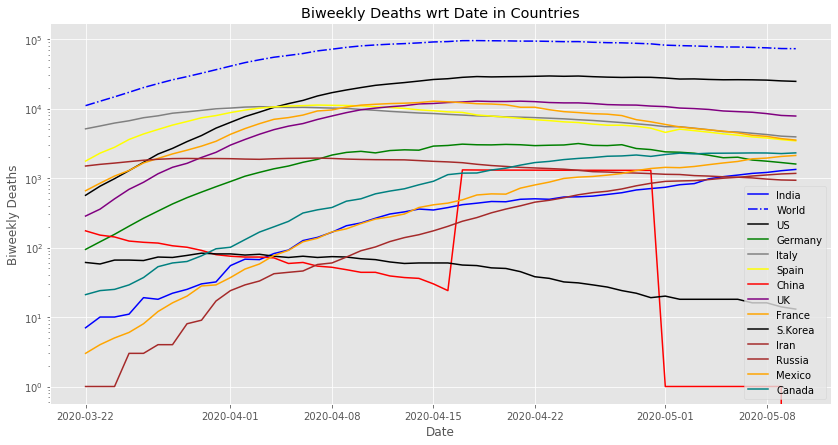

In [17]:
plotter(Biweekly_Deaths[Important_countries].tail(50), 'Biweekly Deaths', True)

In [18]:
# Biweekly increase in biweekly deaths
Increase_Biweekly = Biweekly_Deaths-Biweekly_Deaths.shift(14)
Increase_Biweekly = Increase_Biweekly.fillna(0).astype('int')
Increase_Biweekly[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-04-27,255,2761,4671,383,-2362,-4275,1255,410,-3646,-32,-607,507,798,1359
2020-04-28,257,161,3198,501,-2347,-3826,1256,-392,-4267,-36,-591,544,786,1282
2020-04-29,327,-3978,2000,-221,-2453,-3754,1261,-616,-5834,-38,-561,600,871,1248
2020-04-30,330,-6715,1263,-374,-2458,-3739,1267,-1354,-6067,-41,-550,639,937,931
2020-05-01,323,-13177,-633,-693,-2573,-4263,-1309,-1770,-6249,-36,-531,657,940,1004
2020-05-02,367,-14634,-2282,-662,-2382,-3039,-1305,-2623,-6313,-37,-454,639,840,1100
2020-05-03,372,-14997,-1833,-722,-2549,-3001,-1302,-2660,-6447,-33,-430,603,876,924
2020-05-04,518,-15890,-2502,-921,-2626,-2935,-1300,-2930,-6404,-32,-402,593,972,888
2020-05-05,553,-16571,-2917,-1057,-2854,-2906,-1300,-3544,-5716,-27,-382,597,934,745


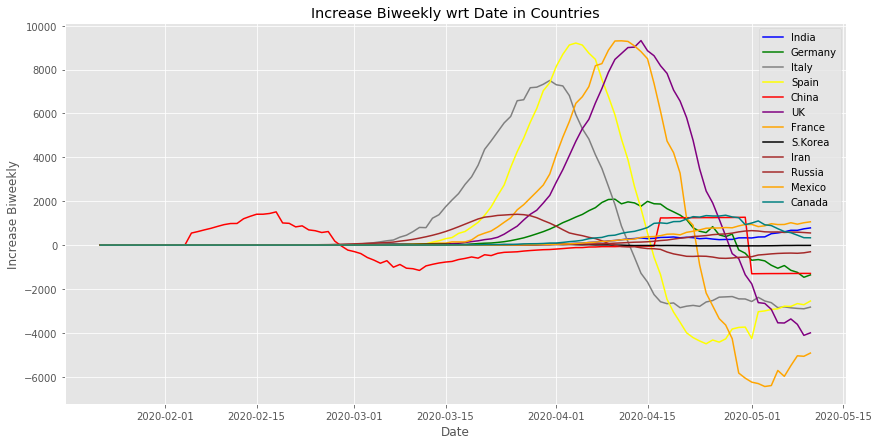

In [19]:
plotter(Increase_Biweekly[[c for c in Important_countries if c not in ['World', 'US']]], 'Increase Biweekly', False)

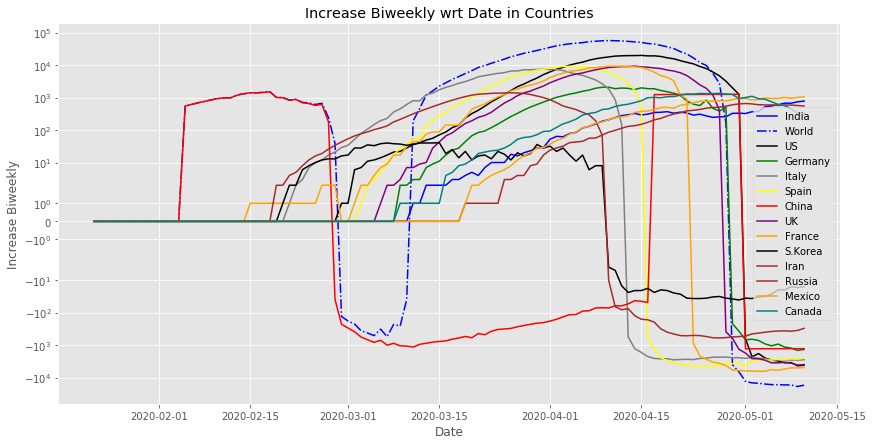

In [20]:
plotter(Increase_Biweekly, 'Increase Biweekly', log = 'symlog')

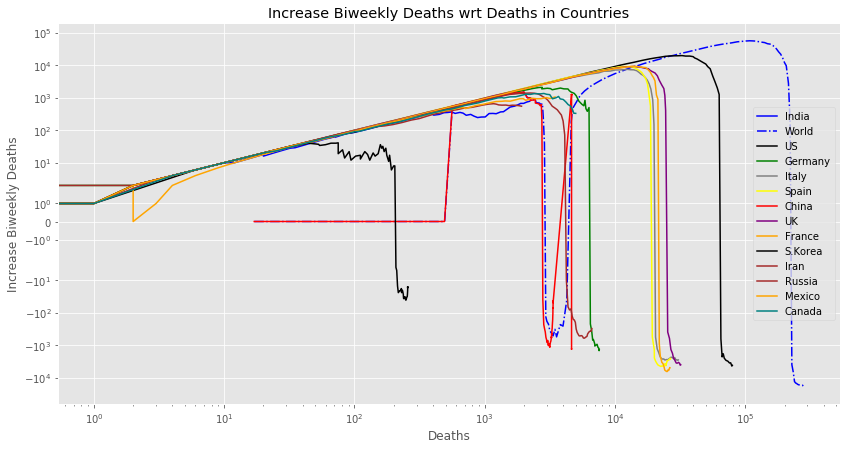

In [21]:
plot2(Deaths, Increase_Biweekly, 'Increase Biweekly Deaths', log = 'symlog')

In [22]:
Slope = np.round(Increase_Biweekly/Biweekly_Deaths, 4)
Slope[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-04-27,0.4389,0.0311,0.1648,0.1306,-0.3627,-0.7415,0.9714,0.0359,-0.4387,-1.1852,-0.4971,0.7848,0.7241,0.6597
2020-04-28,0.4179,0.0018,0.1138,0.1659,-0.3730,-0.6635,0.9721,-0.0348,-0.5379,-1.5000,-0.4950,0.7805,0.6758,0.6158
2020-04-29,0.4852,-0.0457,0.0708,-0.0830,-0.4063,-0.6743,0.9768,-0.0549,-0.8429,-1.7273,-0.4754,0.7752,0.6789,0.5813
2020-04-30,0.4674,-0.0786,0.0448,-0.1455,-0.4240,-0.7152,0.9814,-0.1246,-0.9396,-2.1579,-0.4745,0.7598,0.6824,0.4539
2020-05-01,0.4383,-0.1611,-0.0230,-0.2907,-0.4686,-0.9388,-1309.0000,-0.1658,-1.0566,-1.8000,-0.4687,0.7333,0.6592,0.4603
2020-05-02,0.4576,-0.1816,-0.0857,-0.2813,-0.4344,-0.6009,-1305.0000,-0.2577,-1.1609,-2.0556,-0.4036,0.7030,0.5953,0.4818
2020-05-03,0.4471,-0.1882,-0.0686,-0.3167,-0.4879,-0.6238,-1302.0000,-0.2662,-1.2446,-1.8333,-0.3963,0.6561,0.5967,0.4143
2020-05-04,0.5318,-0.2026,-0.0953,-0.4322,-0.5289,-0.6414,-1300.0000,-0.3015,-1.2971,-1.7778,-0.3764,0.6236,0.6235,0.3902
2020-05-05,0.5277,-0.2152,-0.1123,-0.5393,-0.6115,-0.6710,-1300.0000,-0.3837,-1.2062,-1.5000,-0.3663,0.6000,0.5661,0.3268


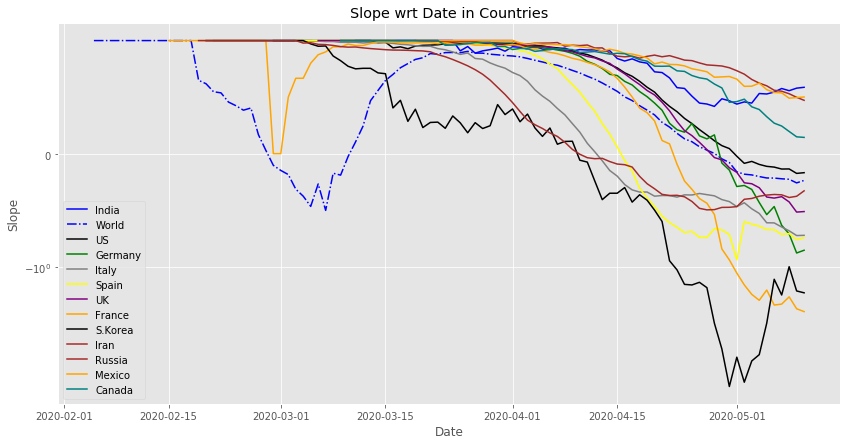

In [23]:
plotter(Slope[[c for c in Important_countries if c!='China']], 'Slope', log = 'symlog')

In [24]:
# Biweekly increase in increase of Biweekly Deaths
Growth_Increase_Biweekly = Increase_Biweekly-Increase_Biweekly.shift(14)
Growth_Increase_Biweekly = Growth_Increase_Biweekly.fillna(0).astype('int')
Growth_Increase_Biweekly[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-04-27,-41,-51072,-14914,-1538,-1803,-6941,1309,-8611,-12721,-8,-531,377,522,734
2020-04-28,-69,-51758,-16463,-1267,-1061,-5487,1299,-9711,-13083,-15,-466,408,438,578
2020-04-29,35,-54110,-17896,-2213,-766,-4311,1306,-9473,-14324,-17,-401,450,496,450
2020-04-30,22,-52973,-17980,-2256,-203,-3188,1316,-9983,-13437,-23,-383,466,550,-59
2020-05-01,-24,-57779,-19901,-2562,12,-2912,-2546,-9941,-12343,-12,-334,451,512,-6
2020-05-02,14,-55011,-20767,-2317,290,-563,-2540,-10446,-11053,-17,-137,411,346,116
2020-05-03,4,-51440,-18614,-2234,89,56,-2546,-9725,-10657,-12,-27,331,375,-144
2020-05-04,188,-48212,-18159,-2286,229,584,-2540,-9492,-9681,-7,55,281,506,-186
2020-05-05,198,-42497,-16629,-2215,-68,1094,-2547,-9351,-6930,0,131,256,354,-441


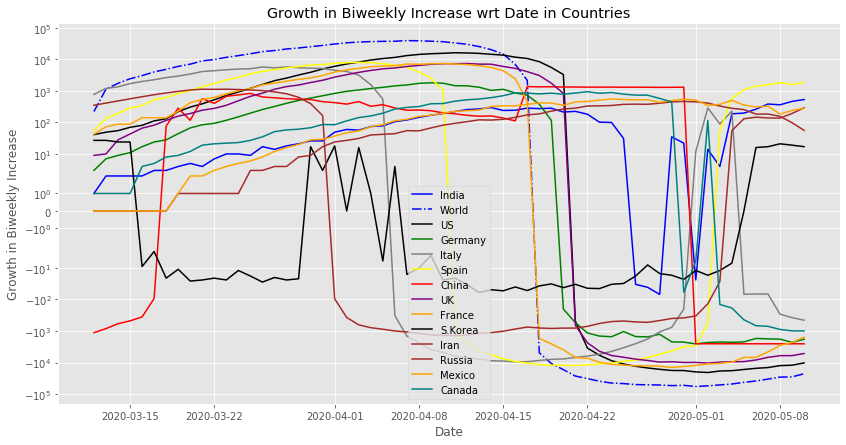

In [25]:
plotter(Growth_Increase_Biweekly.tail(60), 'Growth in Biweekly Increase', log = 'symlog')

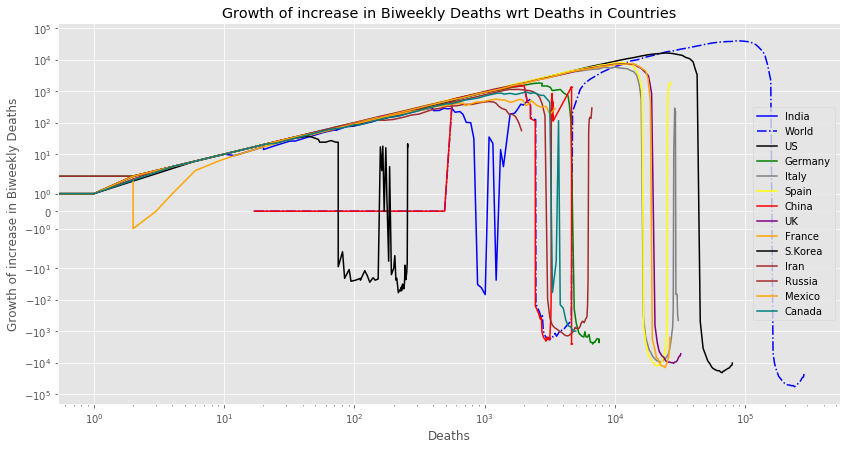

In [26]:
plot2(Deaths, Growth_Increase_Biweekly, 'Growth of increase in Biweekly Deaths', log = 'symlog')

In [27]:
Slope_growth = np.round(Growth_Increase_Biweekly/Biweekly_Deaths, 4)
Slope_growth[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-04-27,-0.0706,-0.5746,-0.5261,-0.5246,-0.2769,-1.2040,1.0132,-0.7546,-1.5308,-0.2963,-0.4349,0.5836,0.4737,0.3563
2020-04-28,-0.1122,-0.5857,-0.5860,-0.4195,-0.1686,-0.9516,1.0054,-0.8614,-1.6494,-0.6250,-0.3903,0.5854,0.3766,0.2776
2020-04-29,0.0519,-0.6219,-0.6339,-0.8310,-0.1269,-0.7744,1.0116,-0.8439,-2.0696,-0.7727,-0.3398,0.5814,0.3866,0.2096
2020-04-30,0.0312,-0.6202,-0.6383,-0.8775,-0.0350,-0.6098,1.0194,-0.9186,-2.0810,-1.2105,-0.3305,0.5541,0.4006,-0.0288
2020-05-01,-0.0326,-0.7062,-0.7228,-1.0747,0.0022,-0.6413,-2546.0000,-0.9314,-2.0871,-0.6000,-0.2948,0.5033,0.3590,-0.0028
2020-05-02,0.0175,-0.6825,-0.7802,-0.9847,0.0529,-0.1113,-2540.0000,-1.0264,-2.0325,-0.9444,-0.1218,0.4521,0.2452,0.0508
2020-05-03,0.0048,-0.6454,-0.6962,-0.9798,0.0170,0.0116,-2546.0000,-0.9732,-2.0573,-0.6667,-0.0249,0.3602,0.2554,-0.0646
2020-05-04,0.1930,-0.6146,-0.6914,-1.0727,0.0461,0.1276,-2540.0000,-0.9768,-1.9609,-0.3889,0.0515,0.2955,0.3246,-0.0817
2020-05-05,0.1889,-0.5519,-0.6401,-1.1301,-0.0146,0.2526,-2547.0000,-1.0123,-1.4623,0.0000,0.1256,0.2573,0.2145,-0.1934


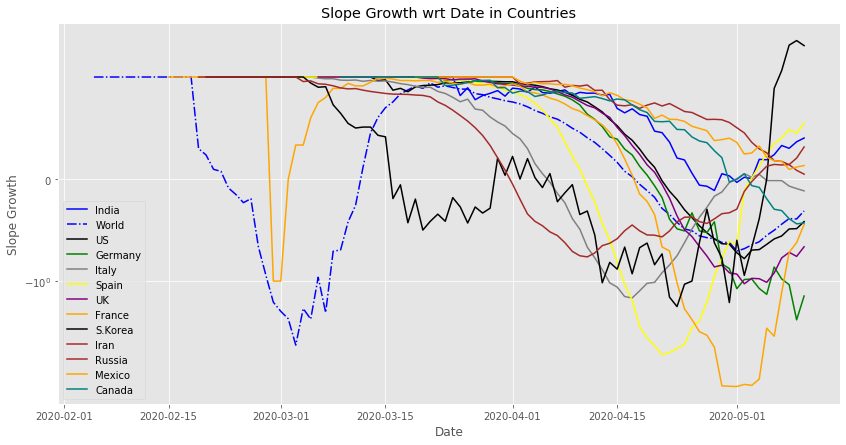

In [28]:
plotter(Slope_growth[[c for c in Important_countries if c!='China']], 'Slope Growth', log = 'symlog')

In [29]:
Biweekly_Growth = np.round(Deaths/Deaths.shift(14), 4)
Biweekly_Growth[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-04-27,2.6229,1.7079,2.0172,1.9180,1.3182,1.3247,1.3862,1.8746,1.5545,1.1244,1.2663,5.3649,4.3193,3.6376
2020-04-28,2.5649,1.6672,1.9283,1.9168,1.2987,1.3193,1.3862,1.7999,1.5042,1.1081,1.2550,5.1000,3.8645,3.3108
2020-04-29,2.6642,1.6186,1.8625,1.7001,1.2789,1.2976,1.3858,1.7513,1.4031,1.0978,1.2470,4.9091,3.8575,3.1300
2020-04-30,2.5759,1.5773,1.8088,1.6345,1.2615,1.2707,1.3858,1.6804,1.3603,1.0830,1.2380,4.6250,3.8251,2.6291
2020-05-01,2.5165,1.5218,1.7359,1.5478,1.2414,1.2270,1.0002,1.6312,1.3165,1.0870,1.2285,4.2821,3.6117,2.6084
2020-05-02,2.5393,1.4938,1.6695,1.5277,1.2361,1.2523,1.0002,1.5645,1.2814,1.0776,1.2236,3.9042,3.1708,2.6296
2020-05-03,2.4884,1.4750,1.6530,1.4972,1.2208,1.2352,1.0002,1.5394,1.2627,1.0769,1.2120,3.5457,3.1399,2.4249
2020-05-04,2.6453,1.4532,1.6156,1.4383,1.2059,1.2195,1.0002,1.5090,1.2436,1.0763,1.2050,3.3481,3.1896,2.3179
2020-05-05,2.6248,1.4272,1.5762,1.3894,1.1893,1.2035,1.0002,1.4558,1.2279,1.0759,1.1969,3.1820,2.9253,2.1937


In [30]:
Reproductivity = np.round(Biweekly_Deaths/Biweekly_Deaths.shift(14), 4)
Reproductivity[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-04-27,1.7822,1.0321,1.1973,1.1503,0.7338,0.5742,34.9189,1.0373,0.6950,0.4576,0.6679,4.6475,3.6250,2.9387
2020-04-28,1.7179,1.0018,1.1285,1.1989,0.7283,0.6011,35.8889,0.9664,0.6502,0.4000,0.6689,4.5556,3.0849,2.6025
2020-04-29,1.9424,0.9563,1.0762,0.9234,0.7111,0.5973,43.0333,0.9480,0.5426,0.3667,0.6778,4.4483,3.1141,2.3882
2020-04-30,1.8777,0.9271,1.0469,0.8730,0.7022,0.5830,53.7917,0.8892,0.5156,0.3167,0.6782,4.1634,3.1491,1.8312
2020-05-01,1.7802,0.8613,0.9775,0.7748,0.6809,0.5158,0.0008,0.8578,0.4862,0.3571,0.6809,3.7490,2.9342,1.8530
2020-05-02,1.8437,0.8463,0.9210,0.7804,0.6971,0.6246,0.0008,0.7951,0.4628,0.3273,0.7125,3.3667,2.4711,1.9298
2020-05-03,1.8087,0.8416,0.9358,0.7595,0.6721,0.6158,0.0008,0.7898,0.4455,0.3529,0.7162,2.9082,2.4797,1.7075
2020-05-04,2.1360,0.8315,0.9130,0.6982,0.6541,0.6092,0.0008,0.7683,0.4353,0.3600,0.7265,2.6564,2.6559,1.6398
2020-05-05,2.1172,0.8229,0.8990,0.6497,0.6205,0.5985,0.0008,0.7227,0.4533,0.4000,0.7319,2.5000,2.3045,1.4853


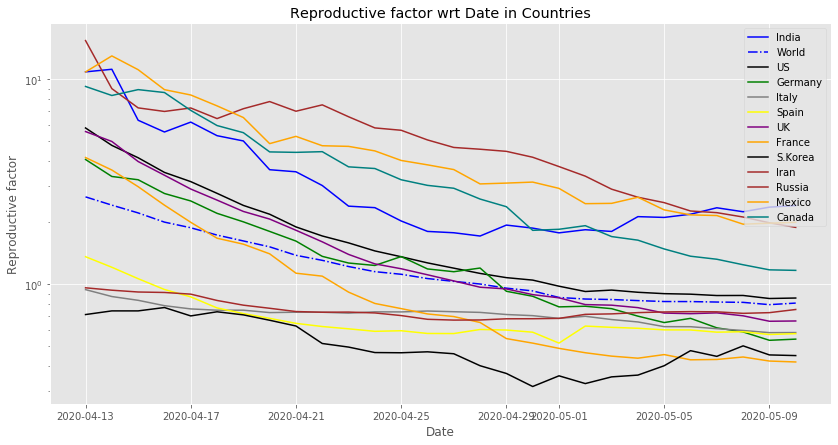

In [31]:
plotter(Reproductivity[[c for c in Important_countries if c != 'China']].tail(28), 'Reproductive factor', True)

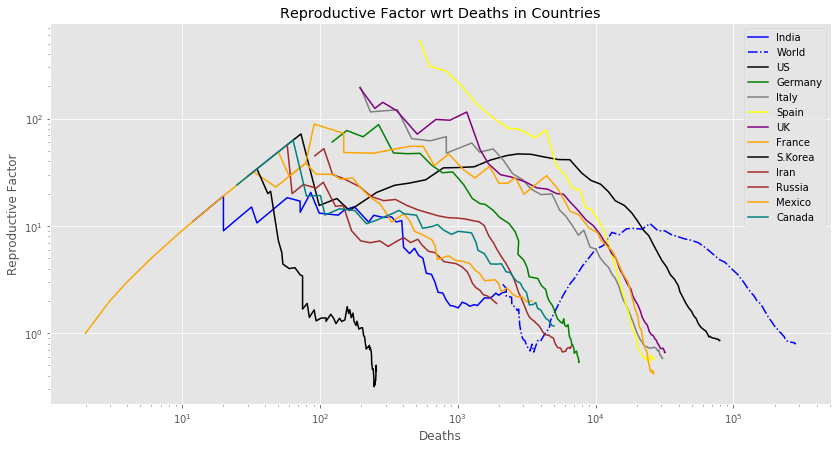

In [32]:
plot2(Deaths[[c for c in Important_countries if c != 'China']], 
      Reproductivity[[c for c in Important_countries if c != 'China']], 
      'Reproductive Factor', log = True)

In [33]:
Daily_Deaths = Deaths-Deaths.shift(1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-04-27,58,4544,1338,150,333,331,0,341,437,1,96,47,83,154
2020-04-28,69,6357,2136,188,382,301,0,911,367,2,71,73,135,142
2020-04-29,71,6864,2612,153,323,453,0,797,427,1,80,105,163,172
2020-04-30,75,5695,2029,156,285,268,0,676,289,1,71,101,127,155
2020-05-01,69,5259,1947,113,269,0,0,741,218,2,63,96,113,227
2020-05-02,100,5194,1426,76,474,557,0,622,166,0,65,53,89,147
2020-05-03,68,3657,1313,54,174,164,0,315,137,2,47,58,93,111
2020-05-04,175,4067,1240,127,195,164,0,289,304,2,74,76,117,208
2020-05-05,127,5702,2142,0,236,185,0,692,333,1,63,95,236,187


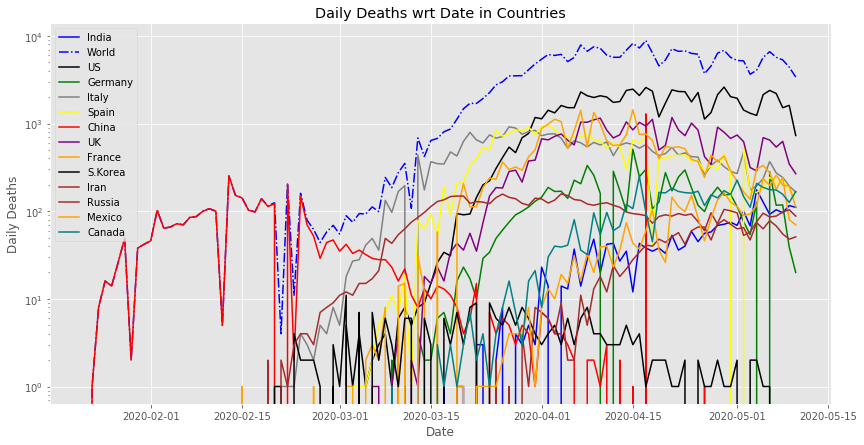

In [34]:
plotter(Daily_Deaths, 'Daily Deaths')

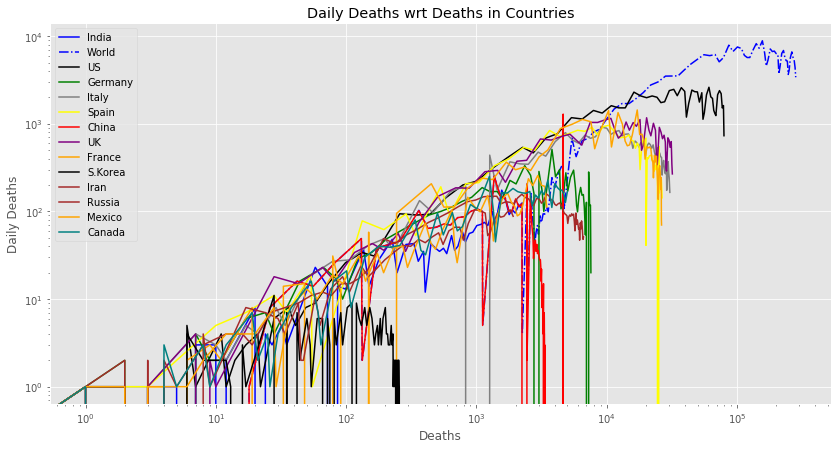

In [35]:
plot2(Deaths, Daily_Deaths, 'Daily Deaths')

In [36]:
#Confirmed = np.round(Removed + Removed*Reproductivity)
Confirmed = np.round(Removed * Biweekly_Growth)
Confirmed[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-04-27,123145.0,18312445.0,5670248.0,587483.0,1778054.0,1557913.0,321390.0,2292448.0,1810682.0,13718.0,367607.0,212987.0,309694.0,516721.0
2020-04-28,129271.0,18405971.0,5626297.0,605134.0,1776557.0,1571418.0,321390.0,2283083.0,1779694.0,13630.0,368782.0,221085.0,303170.0,493806.0
2020-04-29,143734.0,18424928.0,5677552.0,549727.0,1770125.0,1574962.0,321298.0,2291226.0,1690034.0,13558.0,371419.0,238582.0,334060.0,493758.0
2020-04-30,148629.0,18403936.0,5697358.0,541265.0,1764019.0,1559340.0,321298.0,2255265.0,1658138.0,13429.0,373133.0,248131.0,355543.0,435116.0
2020-05-01,153884.0,18156520.0,5636728.0,521299.0,1752609.0,1505713.0,231896.0,2249669.0,1619098.0,13588.0,374140.0,250289.0,356114.0,461296.0
2020-05-02,167975.0,18210393.0,5540152.0,520335.0,1774422.0,1571636.0,231896.0,2206336.0,1586565.0,13470.0,376624.0,238547.0,326751.0,484372.0
2020-05-03,173068.0,18250912.0,5593917.0,513989.0,1763079.0,1560305.0,231896.0,2195184.0,1572062.0,13569.0,375902.0,226925.0,338167.0,460125.0
2020-05-04,207127.0,18276678.0,5567519.0,502902.0,1753318.0,1550472.0,231896.0,2173639.0,1567185.0,13669.0,378189.0,227001.0,362179.0,463928.0
2020-05-05,222189.0,18356575.0,5600554.0,485804.0,1743216.0,1541262.0,231896.0,2147378.0,1567844.0,13718.0,379417.0,230854.0,366686.0,459580.0


In [37]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

In [38]:
D = {
    'Deaths':Deaths,
    'Biweekly Deaths':Biweekly_Deaths,
    'Increase Biweekly':Increase_Biweekly,
    'GBI':Growth_Increase_Biweekly,
    'Slope Increase':Slope,
    'Slope Growth':Slope_growth ,
    'Removed':Removed,
    'Biweekly Growth':Biweekly_Growth,
    'Reproductive Factor':Reproductivity,
    'Daily Deaths':Daily_Deaths,
    'Confirmed':Confirmed
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
All_lastday = LastDay_DF
LastDay_DF = LastDay_DF[LastDay_DF.Deaths>=1200]

In [39]:
LastDay_DF.sort_values('Deaths', ascending = False)#.head(20)

,Deaths,Biweekly Deaths,Increase Biweekly,GBI,Slope Increase,Slope Growth,Removed,Biweekly Growth,Reproductive Factor,Daily Deaths,Confirmed
Country,,,,,,,,,,,
World,282709,72809,-17238,-22755,-0.2368,-0.3125,14135450,1.3469,0.8086,3398,19039038.0
US,79526,24645,-4150,-10279,-0.1684,-0.4171,3976300,1.4491,0.8559,731,5762056.0
UK,31930,7813,-4002,-5187,-0.5122,-0.6639,1596500,1.3240,0.6613,268,2113766.0
Italy,30560,3916,-2829,-454,-0.7224,-0.1159,1528000,1.1470,0.5806,165,1752616.0
Spain,26621,3431,-2550,1875,-0.7432,0.5465,1331050,1.1480,0.5736,143,1528045.0
France,26383,3524,-4923,-1569,-1.3970,-0.4452,1319150,1.1542,0.4172,70,1522563.0
Brazil,11123,6837,3774,1798,0.5520,0.2630,556150,2.5952,2.2321,467,1443320.0
Belgium,8656,1562,-1932,-2257,-1.2369,-1.4449,432800,1.2202,0.4471,75,528103.0
Germany,7569,1593,-1361,-1826,-0.8544,-1.1463,378450,1.2666,0.5393,20,479345.0


In [40]:
LastDay_DF.sort_values('Reproductive Factor', ascending = False)#.head(20)

,Deaths,Biweekly Deaths,Increase Biweekly,GBI,Slope Increase,Slope Growth,Removed,Biweekly Growth,Reproductive Factor,Daily Deaths,Confirmed
Country,,,,,,,,,,,
Ecuador,2127,1551,1308,1340,0.8433,0.8640,106350,3.6927,6.3827,410,392719.0
India,2212,1331,781,535,0.5868,0.4020,110600,2.5108,2.4200,111,277694.0
Brazil,11123,6837,3774,1798,0.5520,0.2630,556150,2.5952,2.2321,467,1443320.0
Peru,1889,1161,626,266,0.5392,0.2291,94450,2.5948,2.1701,75,245079.0
Mexico,3465,2114,1059,280,0.5009,0.1325,173250,2.5648,2.0038,112,444352.0
Russia,1915,1168,551,56,0.4717,0.0479,95750,2.5636,1.8930,88,245465.0
Canada,4991,2304,331,-992,0.1437,-0.4306,249550,1.8575,1.1678,168,463539.0
US,79526,24645,-4150,-10279,-0.1684,-0.4171,3976300,1.4491,0.8559,731,5762056.0
World,282709,72809,-17238,-22755,-0.2368,-0.3125,14135450,1.3469,0.8086,3398,19039038.0
